In [86]:
import pandas as pd
df = pd.read_csv('TT.txt', quotechar='"', skipinitialspace = True)

df = df[(df['mode'] != 'Seed') & (df['mode'] != 'Grounds')]
df['Timestamp'] = pd.to_datetime(df['datetime_utc'])
df = df.set_index('Timestamp')


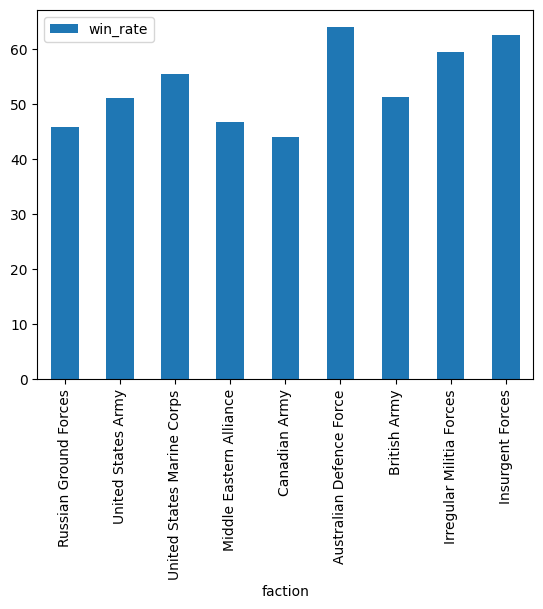

In [87]:
def get_win_rate(df):
    # winner_faction / (winner_faction + loser_faction)
    winners = df['winner_faction'].value_counts().reset_index()
    losers = df['loser_faction'].value_counts().reset_index()
    winners.columns = ['faction', 'winning_count']
    losers.columns = ['faction', 'losing_count']
    
    res = pd.merge(winners, losers, left_on='faction', right_on='faction', how='outer').fillna(0)
    
    res['total_games'] = res['winning_count'] + res['losing_count']
    res['win_rate'] = res['winning_count'] * 100.000 / res['total_games']

    res.plot.bar(x='faction', y='win_rate')

get_win_rate(df)

In [100]:
def maps_played_per_week(df):
    maps = df.resample('W')['level'].value_counts()
    maps.pivot(index='x')

    maps.plot.line(x='Timestamp', y='level')

    print(maps)

maps_played_per_month(df)

Timestamp   level       
2022-10-02  Narva           6
            Black Coast     5
            Mutaha          5
            Gorodok         4
            Kokan           4
                           ..
2022-11-06  Black Coast     1
            Chora           1
            Goose Bay       1
            Kokan           1
            Logar Valley    1
Name: level, Length: 119, dtype: int64
